<a href="https://colab.research.google.com/github/ILMNX/Pattern-recognition/blob/main/ImageFeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Image Feature Extranction
Nama : Gilbert Hasiholan Sibuea\
NPM : 2217051118\
Kelas : D


Teknik Ekstraksi Fitur untuk Pengolahan Gambar
1. Deteksi Tepi
2. Deteksi sudut
3. Deteksi gumpalan
4. Analisis Tekstur

#  Edge Detection

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


img = cv2.imread('img.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 150, 300)

img[edges == 255] = (255,0,0)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Corner Detection

In [ ]:
img = cv2.imread('img.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(gray, 3, 5, 0.1)

corners = dst > 0.05 * dst.max()

coord = np.argwhere(corners)

for y, x in coord:
    cv2.circle(img, (x,y), 3, (0,0,255), -1)

cv2_imshow(img)

#Blob detection

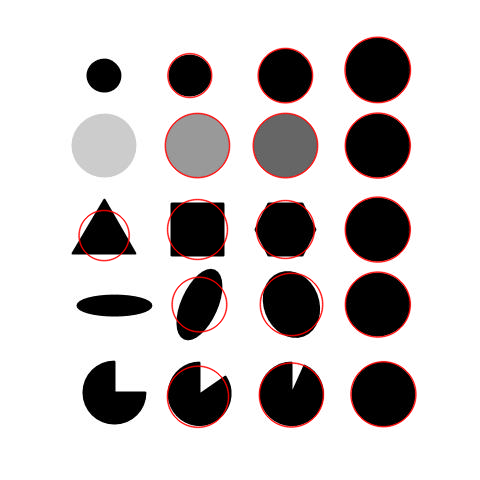

In [ ]:
# Read image
img = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else :
	detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(img)



im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
cv2_imshow(im_with_keypoints)